In [3]:
import numpy as np

input_filename = '/mnt/d/Rowan/AeroDefence/dataset/RFUAV/DJI FPV COMBO/VTSBW=10/pack1_0-1s.iq'
original_dtype = np.complex64

iq_samples = np.memmap(input_filename, dtype=original_dtype)
iq_samples.shape

(100000000,)

In [4]:
dat_filename = '/mnt/d/Rowan/AeroDefence/dataset/Relate work from AeroDefense/Data/Raw data/SR20M_G50_cage_RT15/Autel_EXOII_10_2457_vis.dat'
dat_samples = np.memmap(dat_filename, dtype=np.complex64)
dat_samples.shape

(791947565,)

In [3]:
iq_samples.shape[0] < dat_samples.shape[0]

True

In [24]:
(100e6 * 1500) / 20e6

7500.0

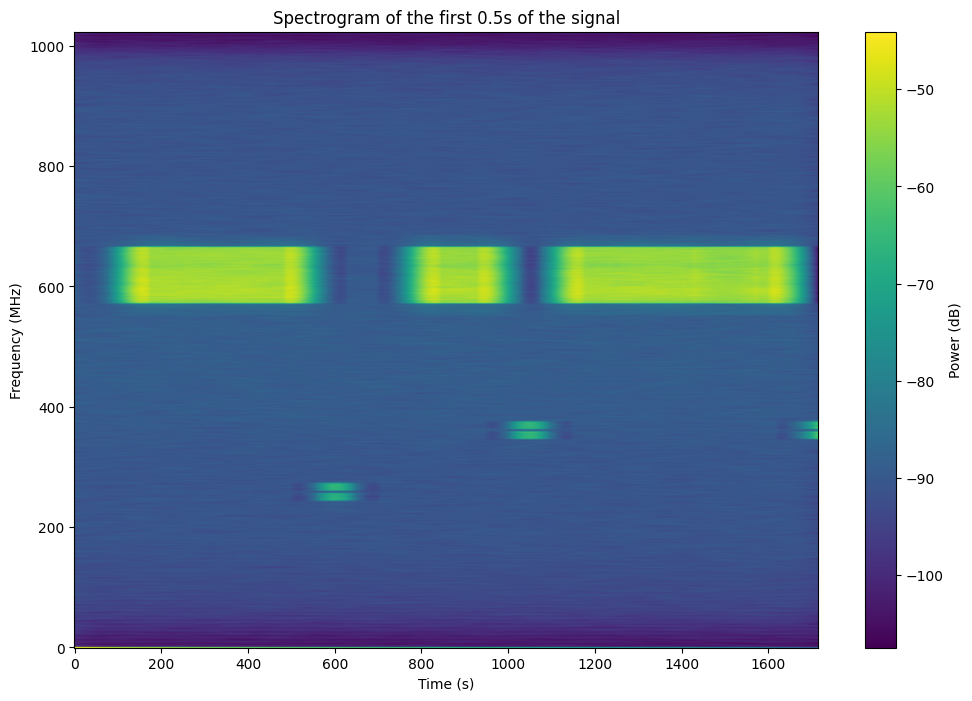

In [5]:
import sys
import os
import matplotlib.pyplot as plt

# Add the 'src' directory to the Python path to import custom modules
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

from src.data.processing import (
    get_centered_stft_matrix,
    get_power_spectrogram_db,
)
from src.data.constants import FFT_SIZE, CENTER_FREQ, NUM_FFT_SPEC

# Take a slice of the data (e.g., first 0.1 seconds)
# Adjust the duration here if you want to see more or less of the signal
i=0
fft_size = FFT_SIZE
sampling_rate = 100e6
# Calculate start and end indices based on time in seconds
duration_to_plot = 0.5  # seconds
# sample rate=20e6 -> num_fft_spec=1500, sampling_rate=100e6 -> num_fft_spec=?
# num_fft_spec = int((100e6 * 1500) / 20e6)
num_fft_spec = 1500
start_index = int(i * duration_to_plot * sampling_rate)
end_index = int((i+1) * duration_to_plot * sampling_rate)

signal_cut = iq_samples[start_index:end_index]

# Truncate the sample to the required length
signal_cut = signal_cut[:num_fft_spec * FFT_SIZE]

# Generate the spectrogram matrix
stft_matrix = get_centered_stft_matrix(signal_cut, sampling_rate=sampling_rate, fft_size=fft_size)
spectrum_db = get_power_spectrogram_db(stft_matrix)

# Apply Savitzky-Golay filter to smooth the FFT power spectrum
from scipy.signal import savgol_filter
spectrum_db = savgol_filter(spectrum_db, 151, 2)

# Plot the spectrogram
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(spectrum_db, aspect='auto', origin='lower',
              )
fig.colorbar(im, ax=ax).set_label('Power (dB)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title(f'Spectrogram of the first {duration_to_plot}s of the signal')
plt.show()


NameError: name 'savgol_filter' is not defined

In [18]:
import roboflow

rf = roboflow.Roboflow(api_key="2lZ6iQJGCddpQhI5fdCC")
model = rf.workspace().project("u-raptor").version("cage-v5").model
prediction = model.download()

loading Roboflow workspace...
loading Roboflow project...


RuntimeError: Version number cage-v5 is not found.